<a href="https://colab.research.google.com/github/santoshgurujula/Springboard/blob/master/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas -U

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [0]:
# First, import the relevant modules
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import glob as gb


In [3]:
#pointing the path to google drive folder
%cd '/content/drive/My Drive/Springboard/data'
!ls

/content/drive/My Drive/Springboard/data
BOM500002.csv  BOM500009.csv  BOM500013.csv  BOM500023.csv
BOM500003.csv  BOM500010.csv  BOM500014.csv  DJI.csv
BOM500008.csv  BOM500012.csv  BOM500020.csv  nasdl.csv


In [0]:
#to read only BSE stock csv files
pattern='BOM*.csv'
#read csv files 
csv_files=gb.glob(pattern)

In [5]:
#print list of data files
print(csv_files)

['BOM500002.csv', 'BOM500003.csv', 'BOM500008.csv', 'BOM500009.csv', 'BOM500010.csv', 'BOM500012.csv', 'BOM500013.csv', 'BOM500014.csv', 'BOM500020.csv', 'BOM500023.csv']


In [0]:
# Copy multiple files to single DF
# Create an empty list: frames
frames = []


In [0]:
#  Iterate over csv_files
for csv in csv_files:
    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)    
    # Append df to frames
    frames.append(df)

In [0]:
# Concatenate frames into a single DataFrame: uber
share_price_df = pd.concat(frames)

In [9]:
# Print the shape of share_price_df
print(share_price_df.shape)


(7248, 15)


In [10]:
# Print the head of share_price_df
print(share_price_df.head())


   Unnamed: 0        Date    Open  ...  Spread H-L  Spread C-O  stockname
0           0  2019-12-31  1305.0  ...        30.0      -20.90  BOM500002
1           1  2019-12-30  1277.0  ...        50.0       10.35  BOM500002
2           2  2019-12-27  1280.0  ...        30.0       -4.25  BOM500002
3           3  2019-12-26  1265.0  ...        43.0        3.50  BOM500002
4           4  2019-12-24  1278.5  ...        38.5      -23.35  BOM500002

[5 rows x 15 columns]


In [11]:
print(share_price_df.columns)

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'WAP',
       'No. of Shares', 'No. of Trades', 'Total Turnover',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread H-L',
       'Spread C-O', 'stockname'],
      dtype='object')


In [0]:
#Drop unwanted columns
share_price_df=share_price_df.drop(labels=['Unnamed: 0'],axis=1)



In [13]:
share_price_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O', 'stockname'],
      dtype='object')

In [0]:
#Sort based on date in ascending order
share_price_df=share_price_df.sort_values(['stockname','Date'],ascending=True)

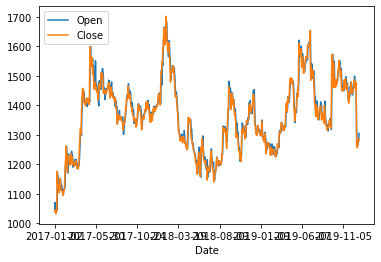

In [15]:
#Plot  stock
share_price_df[share_price_df['stockname']=='BOM500002'].plot(x='Date',
                    y=['Open','Close'],kind='line')


In [16]:
#Pivot based on stockname for only Close price
share_price_pivot_df=share_price_df.pivot(index='Date', columns='stockname').reset_index()
share_price_pivot_df.head()

Date      Open            ... Spread C-O                    
stockname             BOM500002 BOM500003  ...  BOM500014 BOM500020 BOM500023
0          2017-01-02    1045.0    129.00  ...      -0.13     -0.25       NaN
1          2017-01-03    1069.9    132.30  ...      -0.04     -0.20      0.00
2          2017-01-04    1050.0    134.15  ...      -0.01      0.65       NaN
3          2017-01-05    1051.9    132.00  ...       0.07      2.60     -0.05
4          2017-01-06    1037.0    132.90  ...       0.09     -0.90       NaN

[5 rows x 121 columns]

In [17]:
share_price_pivot_df.columns

MultiIndex([(      'Date',          ''),
            (      'Open', 'BOM500002'),
            (      'Open', 'BOM500003'),
            (      'Open', 'BOM500008'),
            (      'Open', 'BOM500009'),
            (      'Open', 'BOM500010'),
            (      'Open', 'BOM500012'),
            (      'Open', 'BOM500013'),
            (      'Open', 'BOM500014'),
            (      'Open', 'BOM500020'),
            ...
            ('Spread C-O', 'BOM500002'),
            ('Spread C-O', 'BOM500003'),
            ('Spread C-O', 'BOM500008'),
            ('Spread C-O', 'BOM500009'),
            ('Spread C-O', 'BOM500010'),
            ('Spread C-O', 'BOM500012'),
            ('Spread C-O', 'BOM500013'),
            ('Spread C-O', 'BOM500014'),
            ('Spread C-O', 'BOM500020'),
            ('Spread C-O', 'BOM500023')],
           names=[None, 'stockname'], length=121)

In [18]:
#To convert Multi index to single index, convert each tuple to list and concatenate with _
columnnames=[]
for column in share_price_pivot_df.columns:
  #print(list(column))
  columnnames.append('_'.join(list(column)).rstrip('_'))
print(columnnames)

['Date', 'Open_BOM500002', 'Open_BOM500003', 'Open_BOM500008', 'Open_BOM500009', 'Open_BOM500010', 'Open_BOM500012', 'Open_BOM500013', 'Open_BOM500014', 'Open_BOM500020', 'Open_BOM500023', 'High_BOM500002', 'High_BOM500003', 'High_BOM500008', 'High_BOM500009', 'High_BOM500010', 'High_BOM500012', 'High_BOM500013', 'High_BOM500014', 'High_BOM500020', 'High_BOM500023', 'Low_BOM500002', 'Low_BOM500003', 'Low_BOM500008', 'Low_BOM500009', 'Low_BOM500010', 'Low_BOM500012', 'Low_BOM500013', 'Low_BOM500014', 'Low_BOM500020', 'Low_BOM500023', 'Close_BOM500002', 'Close_BOM500003', 'Close_BOM500008', 'Close_BOM500009', 'Close_BOM500010', 'Close_BOM500012', 'Close_BOM500013', 'Close_BOM500014', 'Close_BOM500020', 'Close_BOM500023', 'WAP_BOM500002', 'WAP_BOM500003', 'WAP_BOM500008', 'WAP_BOM500009', 'WAP_BOM500010', 'WAP_BOM500012', 'WAP_BOM500013', 'WAP_BOM500014', 'WAP_BOM500020', 'WAP_BOM500023', 'No. of Shares_BOM500002', 'No. of Shares_BOM500003', 'No. of Shares_BOM500008', 'No. of Shares_BOM50

In [19]:
#changing Index name to None 
share_price_pivot_df.columns.name = None
#rename column names
share_price_pivot_df.columns=columnnames
share_price_pivot_df.head()

,Date,Open_BOM500002,Open_BOM500003,Open_BOM500008,Open_BOM500009,Open_BOM500010,Open_BOM500012,Open_BOM500013,Open_BOM500014,Open_BOM500020,Open_BOM500023,High_BOM500002,High_BOM500003,High_BOM500008,High_BOM500009,High_BOM500010,High_BOM500012,High_BOM500013,High_BOM500014,High_BOM500020,High_BOM500023,Low_BOM500002,Low_BOM500003,Low_BOM500008,Low_BOM500009,Low_BOM500010,Low_BOM500012,Low_BOM500013,Low_BOM500014,Low_BOM500020,Low_BOM500023,Close_BOM500002,Close_BOM500003,Close_BOM500008,Close_BOM500009,Close_BOM500010,Close_BOM500012,Close_BOM500013,Close_BOM500014,Close_BOM500020,...,Deliverable Quantity_BOM500002,Deliverable Quantity_BOM500003,Deliverable Quantity_BOM500008,Deliverable Quantity_BOM500009,Deliverable Quantity_BOM500010,Deliverable Quantity_BOM500012,Deliverable Quantity_BOM500013,Deliverable Quantity_BOM500014,Deliverable Quantity_BOM500020,Deliverable Quantity_BOM500023,% Deli. Qty to Traded Qty_BOM500002,% Deli. Qty to Traded Qty_BOM500003,% Deli. Qty to Traded Qty_BOM500008,% Deli. Qty to Traded Qty_BOM500009,% Deli. Qty to Traded Qty_BOM500010,% Deli. Qty to Traded Qty_BOM500012,% Deli. Qty to Traded Qty_BOM500013,% Deli. Qty to Traded Qty_BOM500014,% Deli. Qty to Traded Qty_BOM500020,% Deli. Qty to Traded Qty_BOM500023,Spread H-L_BOM500002,Spread H-L_BOM500003,Spread H-L_BOM500008,Spread H-L_BOM500009,Spread H-L_BOM500010,Spread H-L_BOM500012,Spread H-L_BOM500013,Spread H-L_BOM500014,Spread H-L_BOM500020,Spread H-L_BOM500023,Spread C-O_BOM500002,Spread C-O_BOM500003,Spread C-O_BOM500008,Spread C-O_BOM500009,Spread C-O_BOM500010,Spread C-O_BOM500012,Spread C-O_BOM500013,Spread C-O_BOM500014,Spread C-O_BOM500020,Spread C-O_BOM500023
0,2017-01-02,1045.0,129.00,870.05,7.00,1275.00,21.9,15.50,2.50,49.05,NaN,1052.0,132.45,898.95,7.89,1275.0,22.00,16.08,2.50,49.90,NaN,1035.00,129.00,867.6,7.00,1214.15,21.50,14.86,2.30,48.35,NaN,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,...,1460.0,9551.0,1971.0,30721.0,42019.0,11151.0,65954.0,5628.0,84182.0,NaN,44.15,59.65,12.15,87.01,21.24,77.39,38.58,82.68,27.28,NaN,17.00,3.45,31.35,0.89,60.85,0.50,1.22,0.20,1.55,NaN,-5.05,2.05,26.15,0.09,-55.75,-0.30,-0.20,-0.13,-0.25,NaN
1,2017-01-03,1069.9,132.30,900.00,7.04,1220.00,21.9,15.50,2.47,49.00,106.95,1069.9,135.00,900.00,7.30,1222.0,21.90,15.70,2.48,49.80,106.95,1037.90,132.00,882.9,7.04,1201.00,21.10,15.10,2.32,48.55,106.95,1045.05,132.50,890.20,7.25,1215.25,21.70,15.32,2.43,48.80,...,501.0,27261.0,1993.0,11493.0,77968.0,21459.0,57496.0,1255.0,89332.0,7.0,52.74,37.15,24.99,89.13,54.61,89.96,64.98,80.71,44.10,100.0,32.00,3.00,17.10,0.26,21.00,0.80,0.60,0.16,1.25,0.00,-24.85,0.20,-9.80,0.21,-4.75,-0.20,-0.18,-0.04,-0.20,0.00
2,2017-01-04,1050.0,134.15,892.00,7.13,1215.25,22.5,15.32,2.48,50.25,NaN,1050.0,134.60,909.25,7.40,1225.0,22.75,15.44,2.50,51.90,NaN,1033.50,131.25,890.0,7.11,1197.55,21.25,15.12,2.35,50.25,NaN,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,...,851.0,14109.0,3564.0,18300.0,539272.0,43833.0,23674.0,2219.0,198646.0,NaN,56.06,61.49,24.11,83.89,92.28,74.31,84.28,96.69,31.95,NaN,16.50,3.35,19.25,0.29,27.45,1.50,0.32,0.15,1.65,NaN,-12.65,-2.40,6.50,0.13,-2.75,0.25,-0.04,-0.01,0.65,NaN
3,2017-01-05,1051.9,132.00,905.00,7.02,1225.00,23.7,15.43,2.34,51.25,101.15,1051.9,133.25,935.25,7.50,1225.0,23.85,15.52,2.49,54.40,101.15,1029.55,130.00,900.0,7.02,1205.30,22.90,15.26,2.33,51.20,101.10,1031.45,131.65,916.35,7.34,1216.55,23.85,15.48,2.41,53.85,...,3974.0,26998.0,14755.0,6899.0,20362.0,39329.0,21333.0,8633.0,232928.0,25.0,49.72,59.06,27.79,72.79,23.37,73.78,76.37,69.64,32.58,100.0,22.35,3.25,35.25,0.48,19.70,0.95,0.26,0.16,3.20,0.05,-20.45,-0.35,11.35,0.32,-8.45,0.15,0.05,0.07,2.60,-0.05
4,2017-01-06,1037.0,132.90,916.35,7.35,1216.55,24.9,15.26,2.36,54.20,NaN,1048.0,133.00,932.15,7.55,1232.4,25.00,15.45,2.45,54.35,NaN,1035.55,129.55,915.0,7.21,1216.55,23.00,15.01,2.35,52.75,NaN,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,...,1256.0,13193.0,2110.0,11660.0,150919.0,118287.0,31945

In [53]:
#Validate the data in dataframe
BOM500002_df=pd.read_csv('BOM500023.csv')
BOM500002_df=BOM500002_df.drop(labels=['Unnamed: 0','stockname'],axis=1)

stock_name='BOM500023'
#print(BOM500002_df.columns)
transformed_column_names=[]
transformed_column_names=[i.replace('_'+stock_name,'') for i in share_price_pivot_df.columns if i=='Date' or stock_name in i]
#print(transformed_column_names)
target_columns=[]
target_columns=[i for i in share_price_pivot_df.columns if i=='Date' or stock_name in i]
target_df=share_price_pivot_df[target_columns]
#print(target_df.columns)
target_df.columns=transformed_column_names
target_df.dropna(inplace=True)
BOM500002_df.dropna(inplace=True)
BOM500002_df=BOM500002_df.sort_values(['Date'],ascending=True,ignore_index=True)
target_df=target_df.sort_values(['Date'],ascending=True,ignore_index=True)
print(target_df.columns)
print(BOM500002_df.columns)
from pandas._testing import assert_frame_equal
assert_frame_equal(target_df, BOM500002_df,check_names=False)
#print(BOM500002_df)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Observed that there are NaN value for Stock **BOM500023**
# Check what is the best value to replace **NaN**



In [0]:
share_price_pivot_df.describe()

In [0]:
share_price_pivot_df.info()

In [0]:
share_price_pivot_df[share_price_pivot_df.BOM500023.isna()]

In [0]:
#Forward fill NaN value with previous row value
share_price_pivot_df.ffill(axis=0,inplace=True)

In [0]:
share_price_pivot_df.info()

# Still there is one NaN value, which is first row
# Use Backward fill to fill NaN value with Next day value

In [0]:
share_price_pivot_df.bfill(axis=0,inplace=True)

In [0]:
share_price_pivot_df.info()

In [0]:
#checking Mean value of BOM500023 is changed or not after replacing NaN values
share_price_pivot_df.describe()

In [0]:
#Read NASDL csv File
nasdl_df=pd.read_csv('nasdl.csv')

In [0]:
#Checking for any Null values
nasdl_df.info()

In [0]:
nasdl_df.head()

In [0]:
#Drop unwanted columns
nasdl_df=nasdl_df.drop(labels=['Unnamed: 0'],axis=1)

In [0]:
#changing Index name to None 
nasdl_df.columns.name = None
nasdl_df.head()

In [0]:
#Rename column names
nasdl_df.columns=['Date','Gross_Purchases','Gross_Sales','Net_Investment_INR','Net_Investment_USD','Conversion_Rate']

In [0]:
nasdl_df.info()

In [0]:
#merge stock price and nasdl dataframes
result_df=pd.merge(share_price_pivot_df
                   ,nasdl_df
                   ,left_on='Date'
                   ,right_on='Date'
                   ,how= 'left')

In [0]:
result_df.info()

In [0]:
#there are 6 Null Rows for conversion_rate
result_df[result_df.Conversion_Rate.isna()]

In [0]:
#Use forward fill to fill NaN values
result_df.ffill(axis=0,inplace=True)
result_df.info()

In [0]:
#read DowJoanes Index csv file
dji_df=pd.read_csv('DJI.csv')
dji_df.info()

In [0]:
dji_df.head()

In [0]:
#merge result and dji dataframes
final_df=pd.merge(result_df
                   ,dji_df
                   ,left_on='Date'
                   ,right_on='Date'
                   ,how= 'left')

In [0]:
final_df.info()

In [0]:
#Check rows where Dowjoanes.close is NaN
final_df[final_df.Close.isna()]

In [0]:
#use ffill to replace NaN values
final_df.ffill(axis=0,inplace=True)
final_df.info()

In [0]:
final_df.plot(x='Date',y=['BOM500002','Conversion_Rate'],kind='line')